# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')


# 2. Data Understanding

In [2]:
main_df = pd.read_csv('day.csv')
df = main_df.copy()

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Renaming the column dtday to date
df = df.rename(columns={'dteday':'date' , 'yr': 'year' , 'mnth':'month', 'cnt':'count'})

In [5]:
df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.shape

(730, 16)

In [7]:
# checking Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
date          730 non-null object
season        730 non-null int64
year          730 non-null int64
month         730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
count         730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 88.4+ KB


#### No Null Values Present

In [8]:
# Now we will check Month , Day and Year
date_df = df['date'].apply(lambda x: int(x.split('-')[0]))
date_df.describe()

count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: date, dtype: float64

In [9]:
month_df = df['date'].apply(lambda x: int(x.split('-')[1]))
month_df.describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: date, dtype: float64

In [10]:
year_df = df['date'].apply(lambda x: int(x.split('-')[2]))
year_df.describe()

count     730.000000
mean     2018.500000
std         0.500343
min      2018.000000
25%      2018.000000
50%      2018.500000
75%      2019.000000
max      2019.000000
Name: date, dtype: float64

### All the data of Month , Year and Date are in correct format

In [11]:
df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# Season column Checking
df.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

### 1) Here Season defiend in data dictionary that it is ranges from 1 to 4
### 2) The values of 1 to 4 is as follows:
### (i) 1 : Sping
### (i) 3 : Summer
### (i) 3 : Fall
### (i) 4 : Winter


In [13]:
# Now we map all the values from datasheet
df['season'] = df['season'].map({1: 'spring' , 2:'summer' , 3:'fall' , 4: 'winter'})
df['weathersit'] = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})
df['weekday'] = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df['month'] = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [14]:
# Droping Unwanted Calumns
df.columns

Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

In [15]:
df.drop(['instant','date','casual','registered'],axis=1,inplace=True)

# 3. Data Analysis

In [16]:
# Creating Function for visualizing data
def bar_graph(x):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x,'count',data=df)
    plt.subplot(1,2,2)
    sns.barplot(x,'count',data=df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

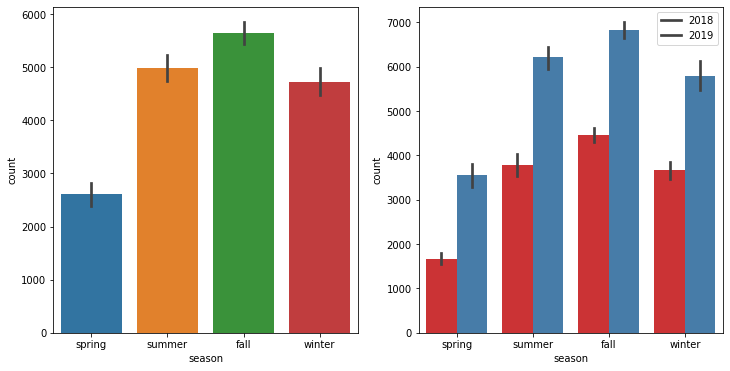

In [17]:
# for season
bar_graph('season')

### 1) Here we can see that in fall there is more booking then other season
### 2) Spring has low booking in both the years

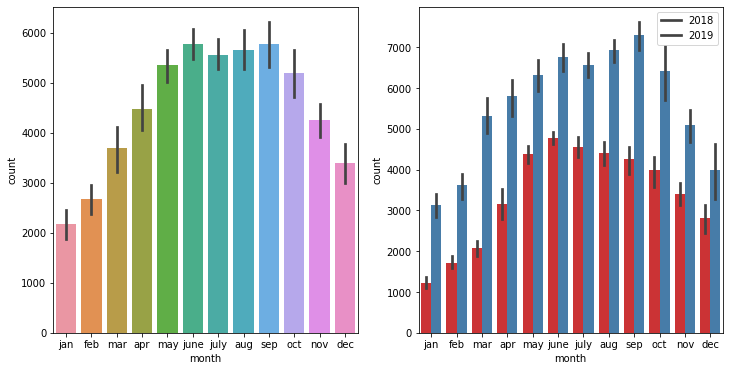

In [18]:
# for Month
bar_graph('month')

### 1) The bar graph illustrate that the most number of bookins has been done between the months May to Oct.
### 2) The least number of bookings has been done in Jan and Feb in both the years

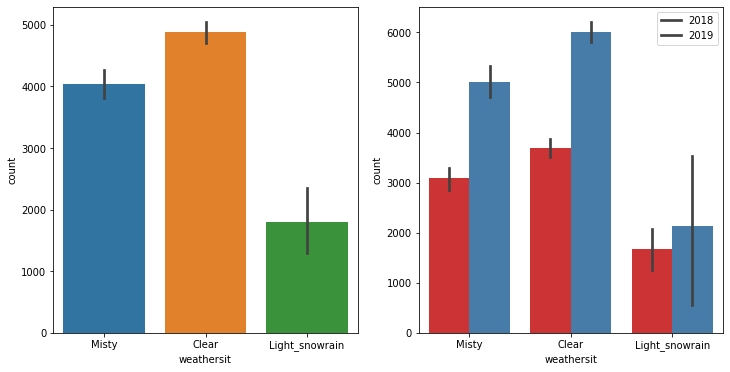

In [19]:
# for weather
bar_graph('weathersit')

### 1) The bar chart decipetates that the most of the booking has been done on clear weather conditions
### 2) Whereas least booking has benn done on Light snow rainy weather

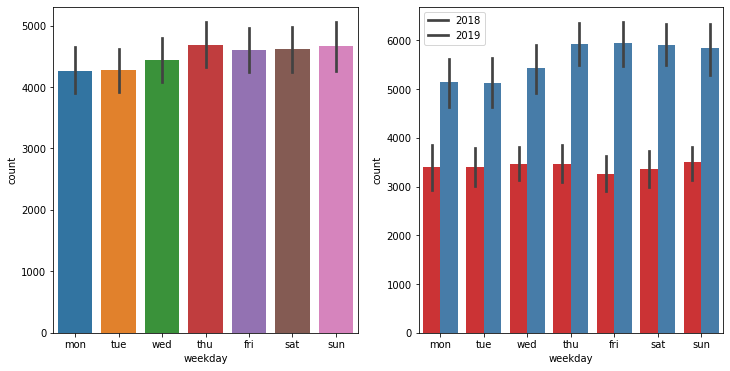

In [20]:
# for week-days
bar_graph('weekday')

### 1) Bar graph shows that Thursday to Sunday have more bookings as compared to other days 

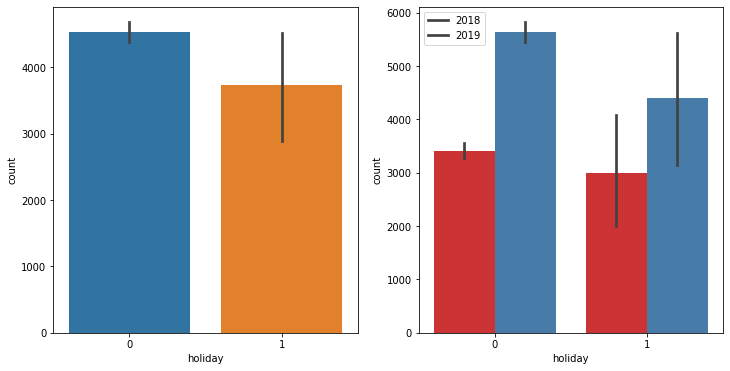

In [21]:
# for Holiday
bar_graph('holiday')

### 1) Bar graph illustrate that the less bookings are when there is no holiday 

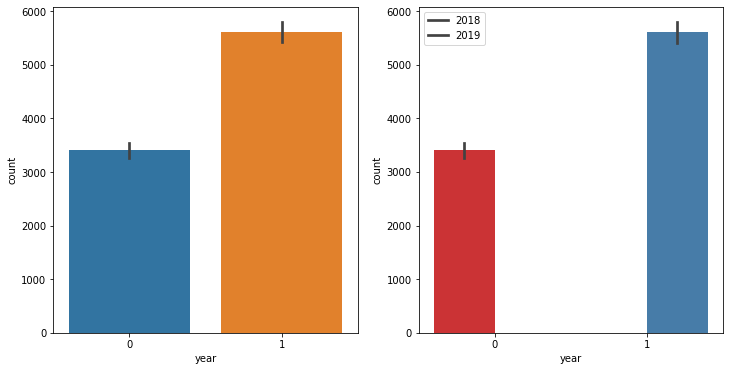

In [22]:
# for year
bar_graph('year')

### 1) Bar chart shows that the Number of bookings has increased from the year 2018 to 2019

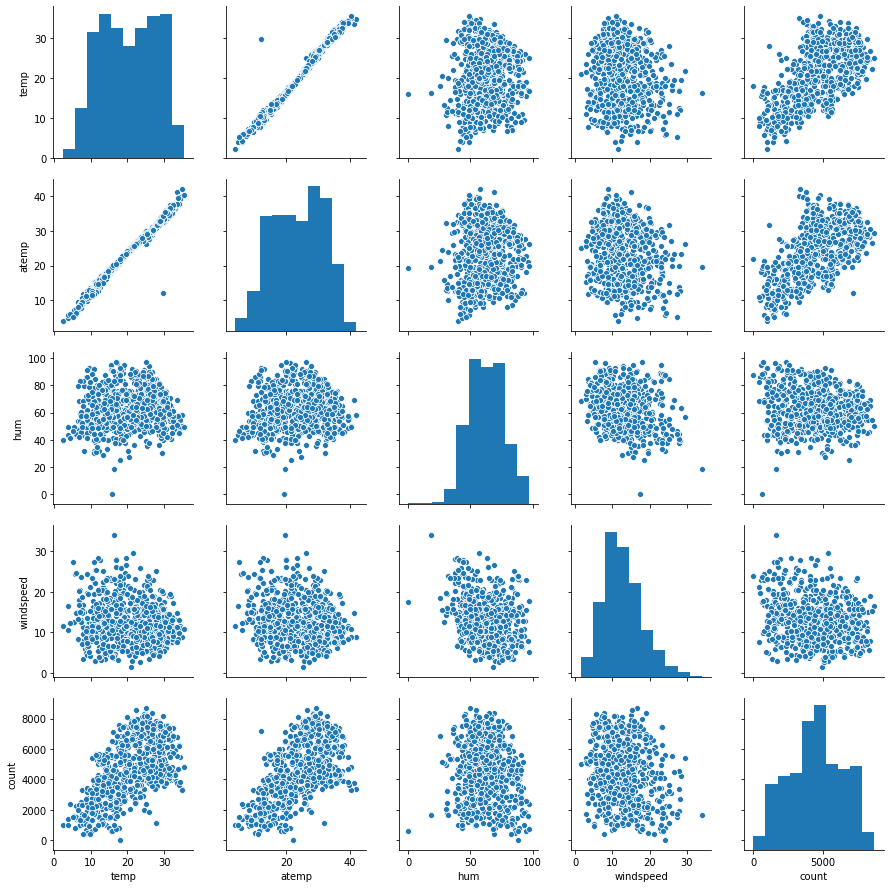

In [23]:
# Visualizing other columns
sns.pairplot(data=df,vars=['temp','atemp','hum','windspeed','count'])
plt.show()

### 1) The temp and atemp are highly correlated with eachother

# 4. Creating ML Model

# 1) Creating Dummy Variables

In [24]:
dummy_vars = ['month' , 'season' , 'weekday' , 'weathersit']

In [25]:
df.shape

(730, 12)

In [26]:
status = pd.get_dummies(df[dummy_vars],drop_first=True)
status.head(10)

,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,...,season_summer,season_winter,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:

df = pd.concat([df, status], axis=1)
df = df.drop(columns=dummy_vars)
df.shape

(730, 30)

In [28]:
# Data training and testing
df_train , df_test = train_test_split(df , train_size = 0.7 , random_state = 100)
df_train.shape

(510, 30)

In [29]:
df_test.shape

(220, 30)

In [30]:
# Normalizing Data
numarical_vars = ['atemp', 'temp' , 'hum' , 'windspeed', 'count']

In [31]:
scaler = MinMaxScaler()

In [32]:
df_train[numarical_vars] = scaler.fit_transform(df_train[numarical_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,count,month_aug,month_dec,...,season_summer,season_winter,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,1,0,0,0,1,0,0,0,0,1


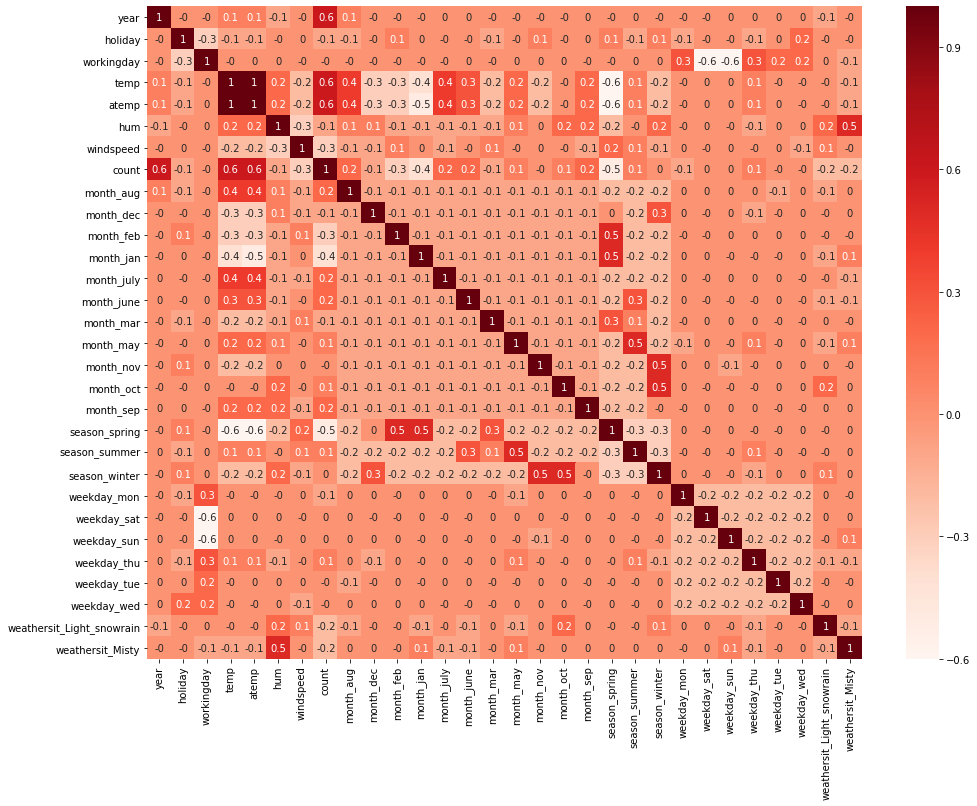

In [33]:
df_train.corr()
plt.figure(figsize=(16,12))
sns.heatmap(round(df_train.corr() , 1) , annot=True , cmap='Reds')
plt.show()

### Since there is no co-relation between any of them so we use Multi co-linearity for Model

In [34]:
# Using Ittrative Modeling Process
y_train = df_train.pop('count')
X_train = df_train

In [35]:
def vif(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

In [36]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [37]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,year,True,1
20,season_winter,True,1
19,season_summer,True,1
18,season_spring,True,1
17,month_sep,True,1
15,month_nov,True,1
27,weathersit_Light_snowrain,True,1
11,month_july,True,1
10,month_jan,True,1
28,weathersit_Misty,True,1


### RFE Model shows 15 predictors

## Model - 1

In [38]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 28 Aug 2023   Prob (F-statistic):          8.15e-189
Time:                        23:12:15   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3197      0.036      8.859      0.000       0.249       0.391
year                          0.2304      0.008     28.487      0.000       0.215       0.246
holiday                      -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                          0.4815      0.037     13.005      0.000       0.409       0.554
hum                          -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                    -0.1887      0.026     -7.315      0.000      -0.239      -0.138
month_dec                    -0.0355      0.018     -2.024      0.043      -0.070      -0.001
month_jan                    -0.0434      0.018     -2.393      0.017      -0.079      -0.008
month_july                   -0.0553      0.018     -3.030      0.003      -0.091      -0.019
month_nov                    -0.0387      0.019     -2.057      0.040      -0.076      -0.002
month_sep                     0.0755      0.017      4.466      0.000       0.042       0.109
season_spring                -0.0613      0.021     -2.881      0.004      -0.103      -0.019
season_summer                 0.0423      0.015      2.761      0.006       0.012       0.072
season_winter                 0.1019      0.018      5.656      0.000       0.067       0.137
weathersit_Light_snowrain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
weathersit_Misty             -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
vif(X_train_rfe)

,Features,VIF
0,hum,30.89
1,temp,17.79
2,windspeed,4.72
3,season_spring,4.37
4,season_winter,4.06
5,season_summer,2.82
6,weathersit_Misty,2.32
7,year,2.09
8,month_nov,1.85
9,month_jan,1.75


## Model - 2

In [40]:
# as humidity shows high VIF we drop it
col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 28 Aug 2023   Prob (F-statistic):          4.75e-186
Time:                        23:12:15   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2450      0.032      7.618      0.000       0.182       0.308
year                          0.2345      0.008     28.687      0.000       0.218       0.251
holiday                      -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp                          0.4387      0.036     12.093      0.000       0.367       0.510
windspeed                    -0.1585      0.025     -6.276      0.000      -0.208      -0.109
month_dec                    -0.0428      0.018     -2.413      0.016      -0.078      -0.008
month_jan                    -0.0500      0.018     -2.719      0.007      -0.086      -0.014
month_july                   -0.0500      0.019     -2.703      0.007      -0.086      -0.014
month_nov                    -0.0395      0.019     -2.064      0.040      -0.077      -0.002
month_sep                     0.0687      0.017      4.015      0.000       0.035       0.102
season_spring                -0.0713      0.021     -3.314      0.001      -0.113      -0.029
season_summer                 0.0349      0.015      2.251      0.025       0.004       0.065
season_winter                 0.0869      0.018      4.831      0.000       0.052       0.122
weathersit_Light_snowrain    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
weathersit_Misty             -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model - 3

In [41]:
# we will drop Nov as it has hogh P-Value
col = col.drop(['month_nov'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 28 Aug 2023   Prob (F-statistic):          2.74e-186
Time:                        23:12:15   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2283      0.031      7.310      0.000       0.167       0.290
year                          0.2343      0.008     28.573      0.000       0.218       0.250
holiday                      -0.0982      0.026     -3.783      0.000      -0.149      -0.047
temp                          0.4581      0.035     13.031      0.000       0.389       0.527
windspeed                    -0.1594      0.025     -6.291      0.000      -0.209      -0.110
month_dec                    -0.0283      0.016     -1.731      0.084      -0.060       0.004
month_jan                    -0.0451      0.018     -2.467      0.014      -0.081      -0.009
month_july                   -0.0499      0.019     -2.686      0.007      -0.086      -0.013
month_sep                     0.0742      0.017      4.373      0.000       0.041       0.108
season_spring                -0.0632      0.021     -2.979      0.003      -0.105      -0.022
season_summer                 0.0404      0.015      2.635      0.009       0.010       0.070
season_winter                 0.0774      0.017      4.438      0.000       0.043       0.112
weathersit_Light_snowrain    -0.2878      0.025    -11.677      0.000      -0.336      -0.239
weathersit_Misty             -0.0793      0.009     -9.089      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       62.961   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.773
Skew:                          -0.660   Prob(JB):                     2.22e-32
Kurtosis:                       5.263   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model - 4

In [42]:
# we will drop Dec as it has hogh P-Value
col = col.drop(['month_dec'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 28 Aug 2023   Prob (F-statistic):          8.14e-187
Time:                        23:12:15   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2154      0.030      7.088      0.000       0.156       0.275
year                          0.2343      0.008     28.517      0.000       0.218       0.250
holiday                      -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp                          0.4721      0.034     13.772      0.000       0.405       0.539
windspeed                    -0.1549      0.025     -6.135      0.000      -0.205      -0.105
month_jan                    -0.0383      0.018     -2.138      0.033      -0.073      -0.003
month_july                   -0.0503      0.019     -2.706      0.007      -0.087      -0.014
month_sep                     0.0764      0.017      4.506      0.000       0.043       0.110
season_spring                -0.0617      0.021     -2.905      0.004      -0.103      -0.020
season_summer                 0.0434      0.015      2.845      0.005       0.013       0.073
season_winter                 0.0757      0.017      4.335      0.000       0.041       0.110
weathersit_Light_snowrain    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
weathersit_Misty             -0.0793      0.009     -9.067      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model - 5

In [43]:
# we will drop Jan as it has hogh P-Value
col = col.drop(['month_jan'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 28 Aug 2023   Prob (F-statistic):          5.06e-187
Time:                        23:12:15   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1994      0.030      6.746      0.000       0.141       0.258
year                          0.2336      0.008     28.352      0.000       0.217       0.250
holiday                      -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp                          0.4910      0.033     14.770      0.000       0.426       0.556
windspeed                    -0.1479      0.025     -5.887      0.000      -0.197      -0.099
month_july                   -0.0521      0.019     -2.790      0.005      -0.089      -0.015
month_sep                     0.0768      0.017      4.517      0.000       0.043       0.110
season_spring                -0.0672      0.021     -3.175      0.002      -0.109      -0.026
season_summer                 0.0465      0.015      3.051      0.002       0.017       0.076
season_winter                 0.0817      0.017      4.730      0.000       0.048       0.116
weathersit_Light_snowrain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
weathersit_Misty             -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model - 6

In [44]:
# we will drop July as it has hogh P-Value
col = col.drop(['month_july'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 28 Aug 2023   Prob (F-statistic):          1.47e-186
Time:                        23:12:15   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1909      0.030      6.447      0.000       0.133       0.249
year                          0.2341      0.008     28.237      0.000       0.218       0.250
holiday                      -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp                          0.4777      0.033     14.423      0.000       0.413       0.543
windspeed                    -0.1481      0.025     -5.854      0.000      -0.198      -0.098
month_sep                     0.0910      0.016      5.566      0.000       0.059       0.123
season_spring                -0.0554      0.021     -2.654      0.008      -0.096      -0.014
season_summer                 0.0621      0.014      4.350      0.000       0.034       0.090
season_winter                 0.0945      0.017      5.630      0.000       0.062       0.127
weathersit_Light_snowrain    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
weathersit_Misty             -0.0787      0.009     -8.938      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model - 7

In [45]:
# we will drop season_spring as it has hogh P-Value
col = col.drop(['season_spring'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 28 Aug 2023   Prob (F-statistic):          2.83e-186
Time:                        23:12:15   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1259      0.017      7.508      0.000       0.093       0.159
year                          0.2329      0.008     27.962      0.000       0.216       0.249
holiday                      -0.0987      0.026     -3.738      0.000      -0.151      -0.047
temp                          0.5480      0.020     27.360      0.000       0.509       0.587
windspeed                    -0.1532      0.025     -6.039      0.000      -0.203      -0.103
month_sep                     0.1012      0.016      6.330      0.000       0.070       0.133
season_summer                 0.0881      0.010      8.437      0.000       0.068       0.109
season_winter                 0.1293      0.011     12.314      0.000       0.109       0.150
weathersit_Light_snowrain    -0.2829      0.025    -11.295      0.000      -0.332      -0.234
weathersit_Misty             -0.0784      0.009     -8.844      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       57.077   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.844
Skew:                          -0.648   Prob(JB):                     1.15e-25
Kurtosis:                       4.930   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5. Errors

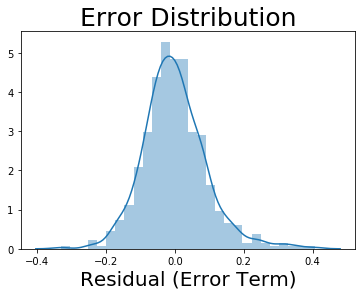

In [46]:
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

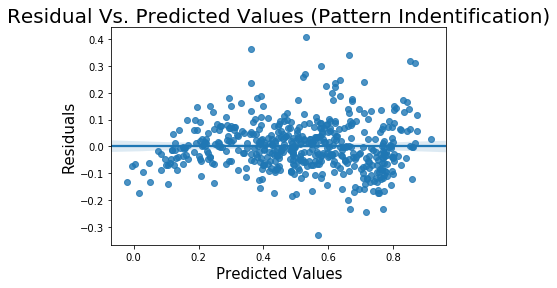

In [47]:
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

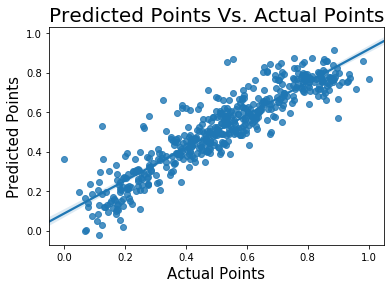

In [48]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

# 6. Preduction on Test Data

In [49]:
df_test[numarical_vars] = scaler.transform(df_test[numarical_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,count,month_aug,month_dec,...,season_summer,season_winter,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,1,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,1,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,1,0,0,0,0,0,0


In [50]:
# Fixing text target and features variables
y_test = df_test.pop('count')
X_test = df_test

In [51]:
# Filtering text Inputs
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [52]:
# Preducting data
y_test_pred = lr_model.predict(X_test_new)

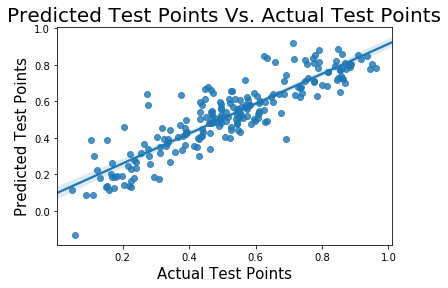

In [53]:
corr_plot = sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

### Here we can see that the predictions and actual data points

In [54]:
# Generating R square
r2_score(y_test, y_test_pred)

0.7941977535477242

### Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.